<a href="https://colab.research.google.com/github/kodenshacho/sigma/blob/master/findpeak_start2end.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:

import numpy as np
from scipy.signal import find_peaks


x = np.linspace(0, 10, 1000)
y = (
    2 * np.exp(-((x - 2.5) / 0.1) ** 2)
    + 1.5 * np.exp(-((x - 5) / 0.05) ** 2)
    + 3 * np.exp(-((x - 7.5) / 0.2) ** 2)
    + np.random.normal(0, 0.1, size=1000)
)


peaks, _ = find_peaks(y, height=1)
left_bases, right_bases = [], []
for peak in peaks:
    left_base, right_base = peak, peak
    while y[left_base] > y[left_base-1]:
        left_base -= 1
    while y[right_base] > y[right_base+1]:
        right_base += 1
    left_bases.append(left_base)
    right_bases.append(right_base)


for i, peak in enumerate(peaks):
    print(f"Peak {i+1}: Start - {x[left_bases[i]]:.2f}, End - {x[right_bases[i]]:.2f}")

Peak 1: Start - 2.38, End - 2.42
Peak 2: Start - 2.42, End - 2.44
Peak 3: Start - 2.44, End - 2.49
Peak 4: Start - 2.49, End - 2.53
Peak 5: Start - 2.53, End - 2.58
Peak 6: Start - 4.90, End - 4.99
Peak 7: Start - 4.99, End - 5.05
Peak 8: Start - 7.17, End - 7.30
Peak 9: Start - 7.30, End - 7.34
Peak 10: Start - 7.34, End - 7.39
Peak 11: Start - 7.39, End - 7.42
Peak 12: Start - 7.42, End - 7.46
Peak 13: Start - 7.46, End - 7.49
Peak 14: Start - 7.49, End - 7.52
Peak 15: Start - 7.52, End - 7.54
Peak 16: Start - 7.54, End - 7.59
Peak 17: Start - 7.59, End - 7.67
Peak 18: Start - 7.67, End - 7.72


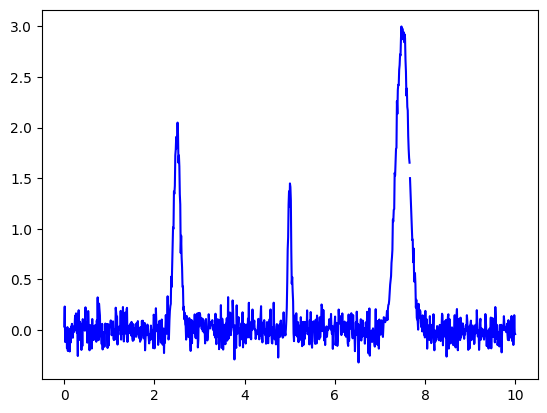

In [7]:

import matplotlib.pyplot as plt


peak_to_remove = 17


start, end = left_bases[peak_to_remove], right_bases[peak_to_remove]


plt.plot(x[:start], y[:start], color="blue")
plt.plot(x[end:], y[end:], color="blue")
plt.plot([x[start], x[end]], [y[start], y[end]], color="blue")
plt.show()

Peak 1: Start - 2.42, End - 2.49
Peak 2: Start - 2.49, End - 2.52
Peak 3: Start - 7.35, End - 7.45
Peak 4: Start - 7.45, End - 7.48
Peak 5: Start - 7.48, End - 7.51
Peak 6: Start - 7.51, End - 7.53
Peak 7: Start - 7.53, End - 7.55
Peak 8: Start - 7.55, End - 7.67


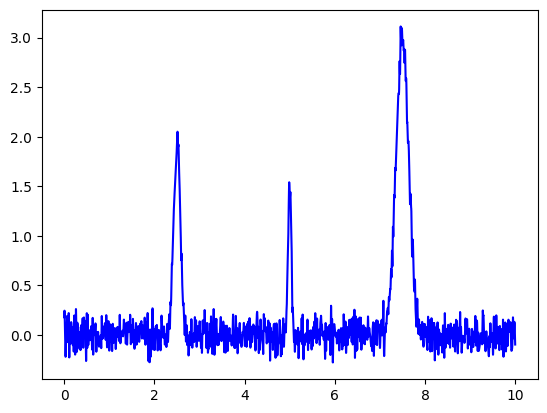

In [17]:

import numpy as np
from scipy.signal import find_peaks
from scipy.interpolate import make_interp_spline

x = np.linspace(0, 10, 1000)
y = (
    2 * np.exp(-((x - 2.5) / 0.1) ** 2)
    + 1.5 * np.exp(-((x - 5) / 0.05) ** 2)
    + 3 * np.exp(-((x - 7.5) / 0.2) ** 2)
    + np.random.normal(0, 0.1, size=1000)
)


peaks, _ = find_peaks(y, height=2)
left_bases, right_bases = [], []
for peak in peaks:
    left_base, right_base = peak, peak
    while y[left_base] > y[left_base-1]:
        left_base -= 1
    while y[right_base] > y[right_base+1]:
        right_base += 1
    left_bases.append(left_base)
    right_bases.append(right_base)

for i, peak in enumerate(peaks):
    print(f"Peak {i+1}: Start - {x[left_bases[i]]:.2f}, End - {x[right_bases[i]]:.2f}")
peaks_to_remove = [0]


start, end = [], []
for peak in peaks_to_remove:
    start.append(left_bases[peak])
    end.append(right_bases[peak])


mask = np.full_like(y, True, dtype=bool)
for s, e in zip(start, end):
    mask[s:e] = False
x_new = x[mask]
y_new = y[mask]
spline = make_interp_spline(x_new, y_new)
x_smooth = np.linspace(x[0], x[-1], 10000)
y_smooth = spline(x_smooth)
plt.plot(x_smooth, y_smooth, color="blue")
plt.show()